In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('dataset/supermarket_sales.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').agg({
    'Quantity': 'sum'       # Sum of quantity sold
})
df = pd.DataFrame(df)
df['Time'] = np.arange(len(df.index))

In [4]:
df

,Quantity,Time
Date,,
2019-01-01,81,0
2019-01-02,48,1
2019-01-03,37,2
2019-01-04,32,3
2019-01-05,55,4
...,...,...
2019-03-26,52,84
2019-03-27,45,85
2019-03-28,48,86


<Axes: xlabel='Time', ylabel='Quantity'>

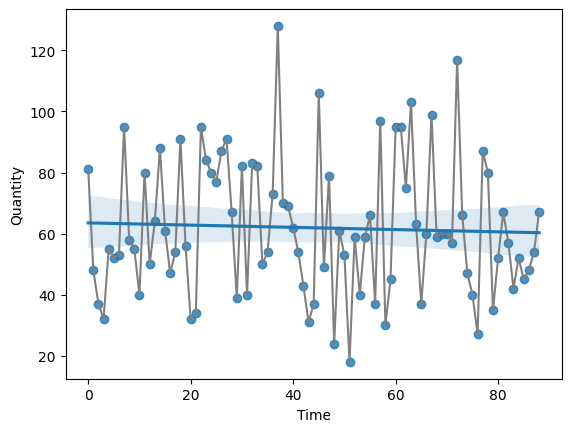

In [5]:
sns.lineplot(data = df, x = df.Time, y = df.Quantity, color = '0.50')
sns.regplot(data = df, x = df.Time, y = df.Quantity)

In [6]:
# Training data
X = df.loc[:, ['Time']]  # features
Y = df.loc[:, 'Quantity']  # target


In [7]:
# Train the model
model = LinearRegression()
model.fit(X, Y)
df['Prediction'] = pd.Series(model.predict(X), index = X.index)
df

,Quantity,Time,Prediction
Date,,,
2019-01-01,81,0,63.518352
2019-01-02,48,1,63.481801
2019-01-03,37,2,63.445250
2019-01-04,32,3,63.408699
2019-01-05,55,4,63.372148
...,...,...,...
2019-03-26,52,84,60.448076
2019-03-27,45,85,60.411525
2019-03-28,48,86,60.374974


<Axes: xlabel='Time', ylabel='Quantity'>

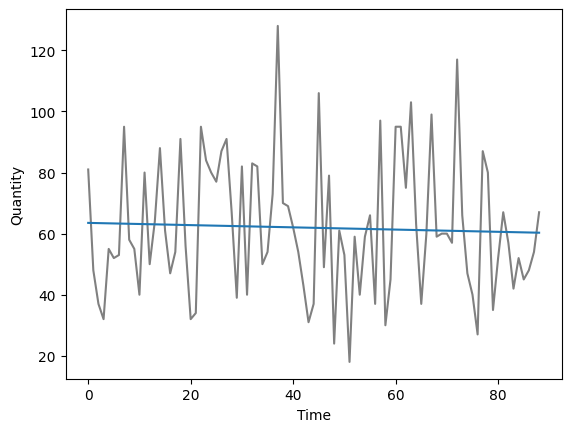

In [8]:
sns.lineplot(data = df, x = df.Time, y = df.Quantity, color = '0.50')
sns.lineplot(data = df, x = df.Time, y = df.Prediction)

In [9]:
np.sqrt(mean_squared_error(df['Quantity'], df['Prediction']))

22.24198027712627

In [10]:
df['Lag_1'] = df['Quantity'].shift(1)
df

,Quantity,Time,Prediction,Lag_1
Date,,,,
2019-01-01,81,0,63.518352,NaN
2019-01-02,48,1,63.481801,81.0
2019-01-03,37,2,63.445250,48.0
2019-01-04,32,3,63.408699,37.0
2019-01-05,55,4,63.372148,32.0
...,...,...,...,...
2019-03-26,52,84,60.448076,42.0
2019-03-27,45,85,60.411525,52.0
2019-03-28,48,86,60.374974,45.0


<Axes: xlabel='Lag_1', ylabel='Quantity'>

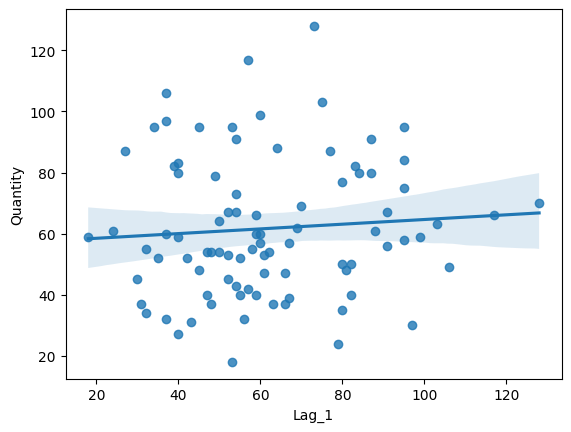

In [11]:
sns.regplot(data = df, x = df.Lag_1, y = df.Quantity)

In [12]:
X_lag = df.loc[:, ['Lag_1']]
X_lag.dropna(inplace = True)  # drop missing values in the feature set
Y_lag = df.loc[:, 'Quantity']  # create the target
Y_lag, X_lag = Y_lag.align(X_lag, join = 'inner')  # drop corresponding values in target

In [13]:
model = LinearRegression()
model.fit(X_lag, Y_lag)

df['Prediction_Lag'] = pd.Series(model.predict(X_lag), index = X_lag.index)
df

,Quantity,Time,Prediction,Lag_1,Prediction_Lag
Date,,,,,
2019-01-01,81,0,63.518352,NaN,NaN
2019-01-02,48,1,63.481801,81.0,63.164416
2019-01-03,37,2,63.445250,48.0,60.628829
2019-01-04,32,3,63.408699,37.0,59.783634
2019-01-05,55,4,63.372148,32.0,59.399454
...,...,...,...,...,...
2019-03-26,52,84,60.448076,42.0,60.167814
2019-03-27,45,85,60.411525,52.0,60.936173
2019-03-28,48,86,60.374974,45.0,60.398322


<Axes: xlabel='Time', ylabel='Quantity'>

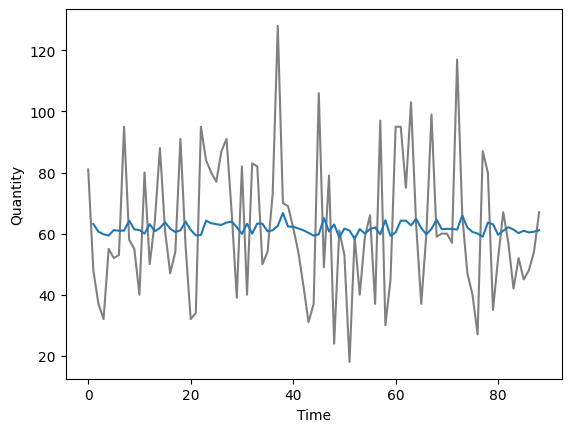

In [14]:
sns.lineplot(data = df, x = df.Time, y = df.Quantity, color = '0.50')
sns.lineplot(data = df, x = df.Time, y = df.Prediction_Lag)

In [15]:
np.sqrt(mean_squared_error(df['Quantity'].iloc[1:], df['Prediction_Lag'].iloc[1:]))

22.227765114139334